In [1]:
!pip install numpy pandas matplotlib scikit-learn tensorflow

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0042
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.1109e-04
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.7511e-05
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 8.3098e-05
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.6413e-05
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.2543e-05
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 7.3864e-05
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 7.5350e-05
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.4022e-05
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.0389e-05
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


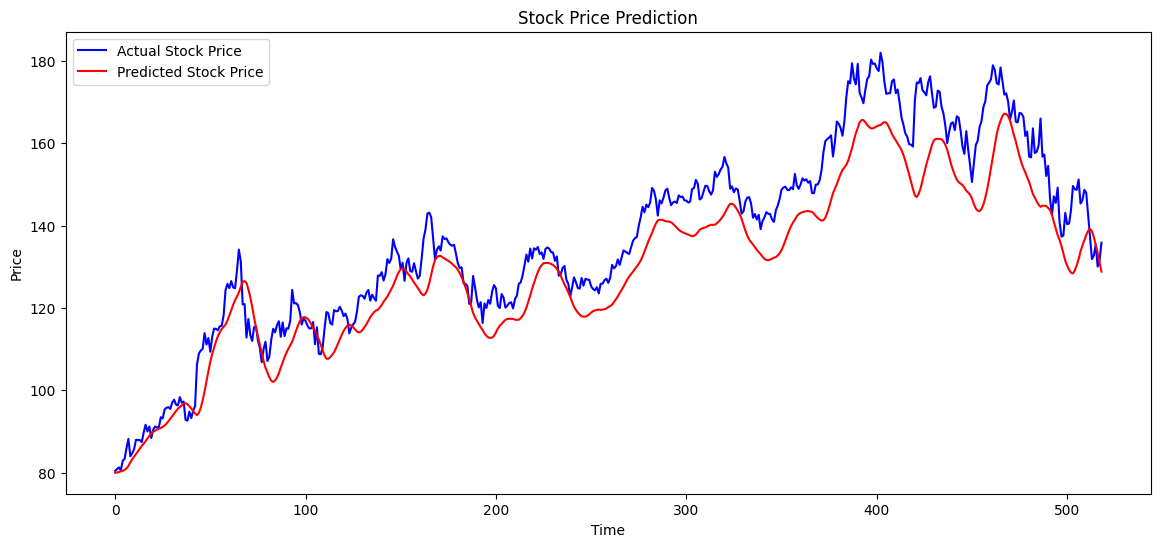

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

df = pd.read_csv('stock_data.csv')  
df = df[['Close']]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_data_len]

X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model = Sequential([
    Input(shape=(60, 1)),  
    LSTM(units=50, return_sequences=True),
    LSTM(units=50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

test_data = scaled_data[training_data_len - 60:]
X_test = []
y_test = df['Close'][training_data_len:].values

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

plt.figure(figsize=(14,6))
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()